<a href="https://colab.research.google.com/github/PRANTIKCHAKRABORTY/EDA/blob/main/21BCE0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/covid-data.csv"
df = pd.read_csv(url)

In [4]:
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-null   

In [7]:
print(df)

     iso_code continent     location        date  total_cases  new_cases  \
0         AFG      Asia  Afghanistan  24/02/2020            5          5   
1         AFG      Asia  Afghanistan  25/02/2020            5          0   
2         AFG      Asia  Afghanistan  26/02/2020            5          0   
3         AFG      Asia  Afghanistan  27/02/2020            5          0   
4         AFG      Asia  Afghanistan  28/02/2020            5          0   
...       ...       ...          ...         ...          ...        ...   
5813      NGA    Africa      Nigeria  06/10/2022       265741        236   
5814      NGA    Africa      Nigeria  07/10/2022       265741          0   
5815      NGA    Africa      Nigeria  08/10/2022       265816         75   
5816      NGA    Africa      Nigeria  09/10/2022       265816          0   
5817      NGA    Africa      Nigeria  10/10/2022       265816          0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0      

In [5]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64


In [6]:
# Handling missing values (dropping or imputing based on the data type)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [7]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


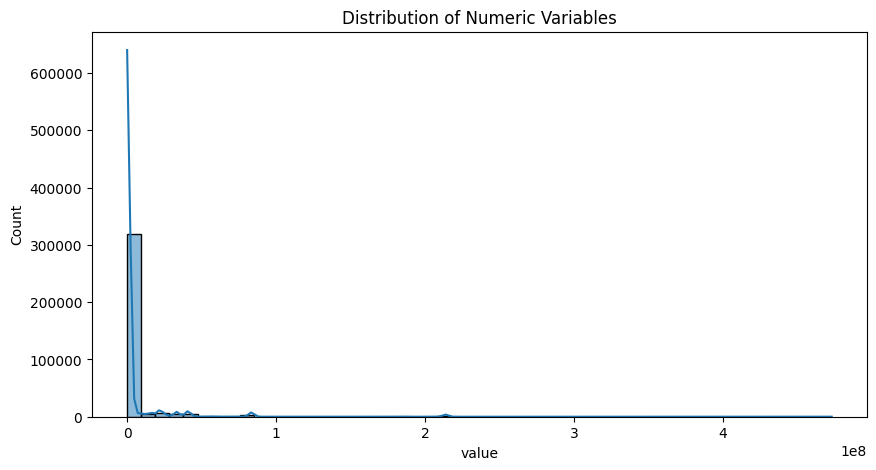

In [8]:
# Univariate Analysis
plt.figure(figsize=(10,5))
sns.histplot(df.select_dtypes(include=['number']).melt()['value'], bins=50, kde=True)
plt.title("Distribution of Numeric Variables")
plt.show()

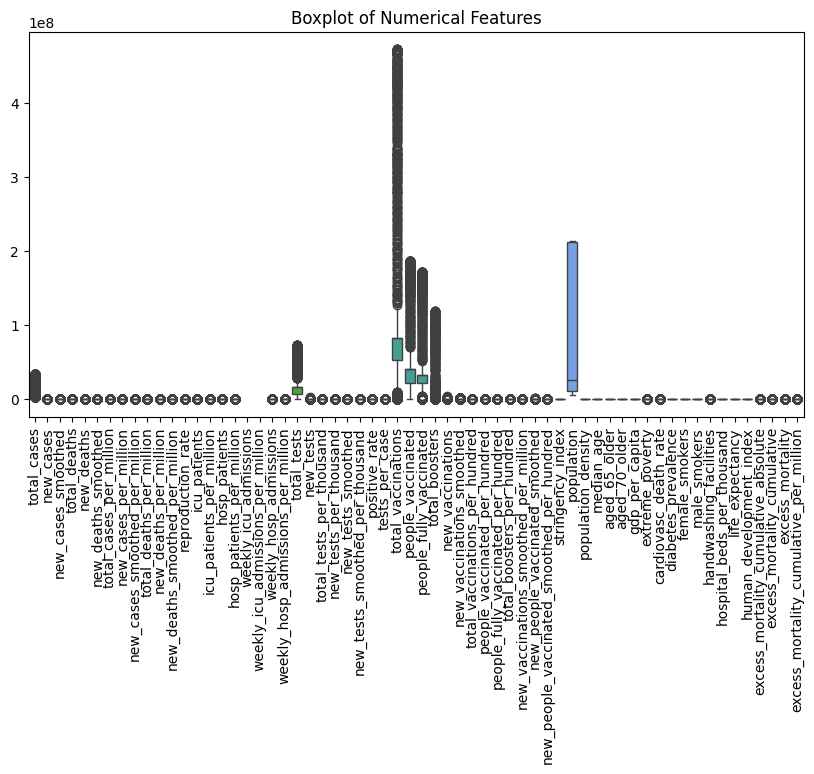

In [9]:
# Box plots for numerical features
plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

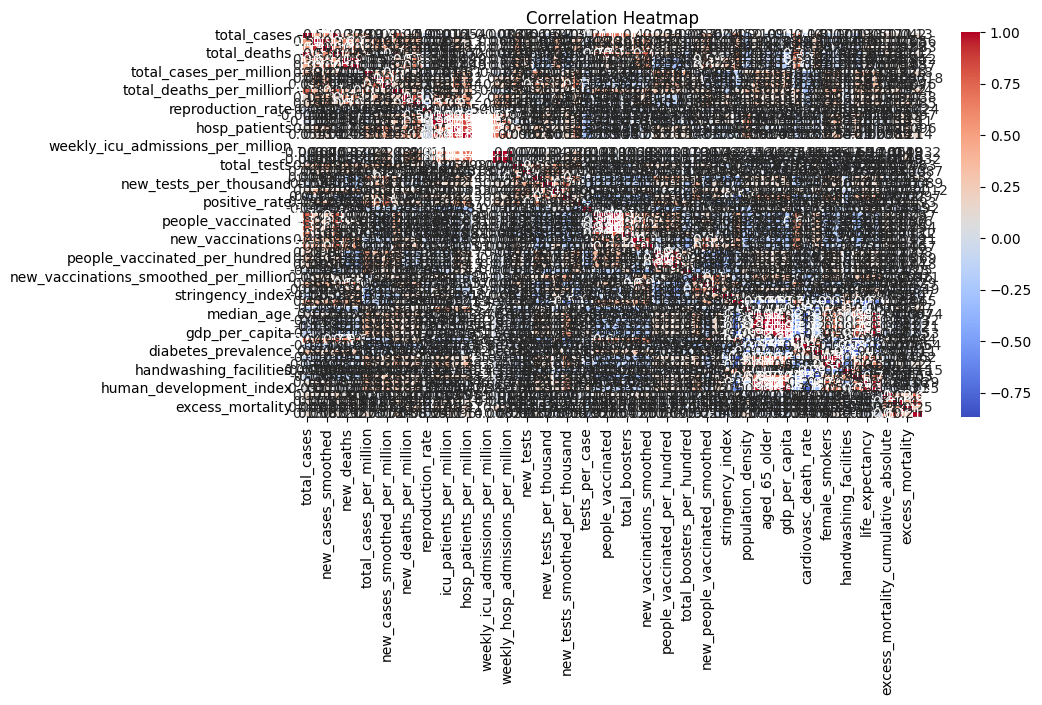

In [10]:
# Bivariate Analysis
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

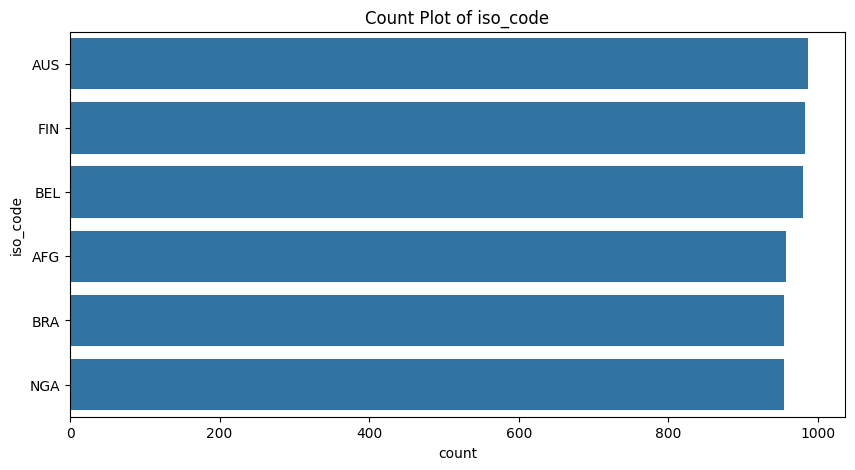

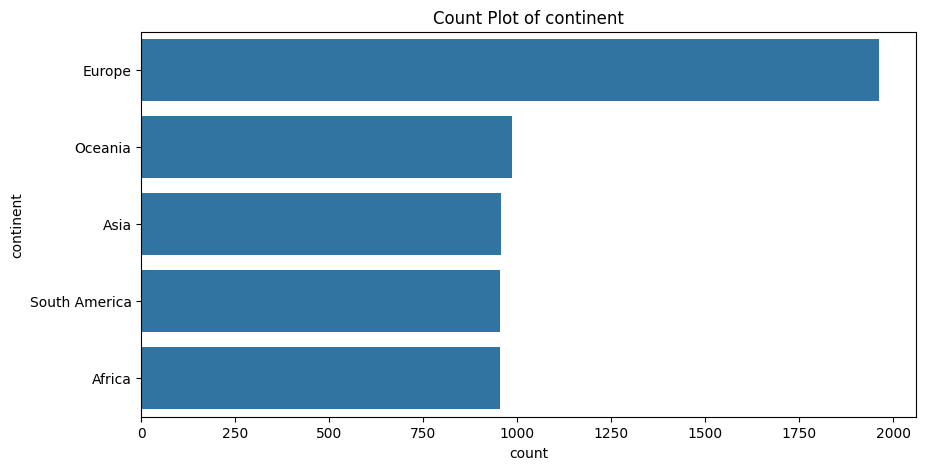

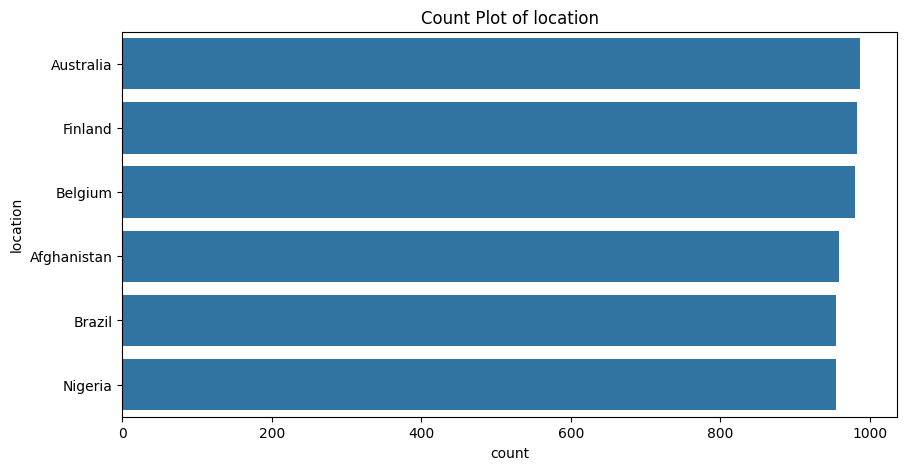

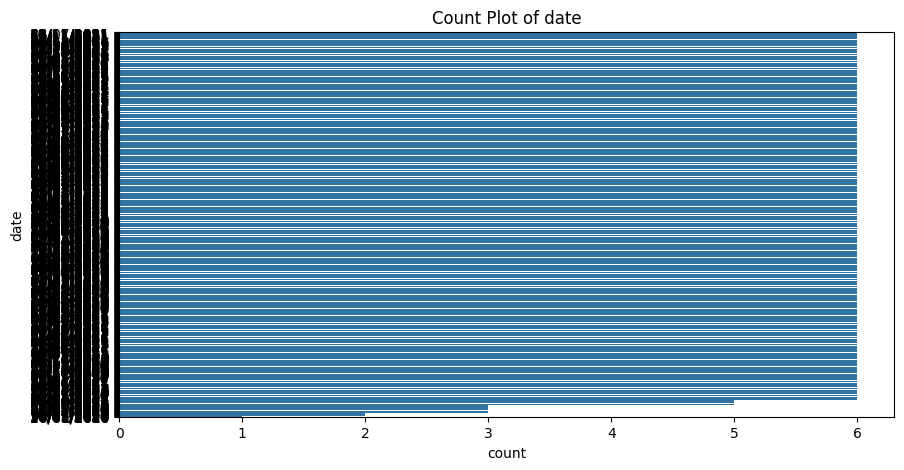

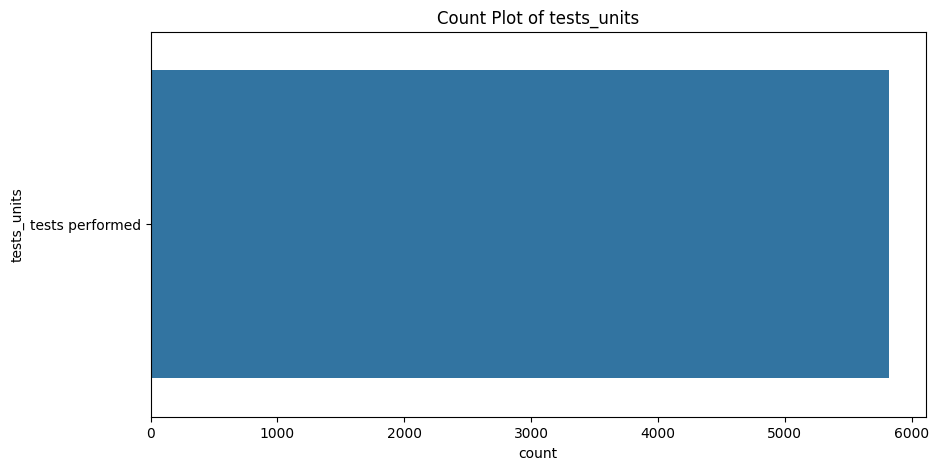

In [11]:
# Categorical variable analysis
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

In [ ]:
# Multivariate Analysis
sns.pairplot(df, hue=cat_cols[0] if len(cat_cols) > 0 else None)
plt.show()

In [14]:
# Final dataset information after cleaning
print("\nFinal Dataset Info:")
print(df.info())


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5818 non-null   float64
 7   total_deaths                                5818 non-null   float64
 8   new_deaths                                  5818 non-null   float64
 9   new_deaths_smoothed                         5818 non-null   floa